# RESPUESTAS QUIZ

<details>
<summary>¿Qué vamos a tratar en dicho notebook?</summary>
<p>
A través de este notebook, vamos a crear una base de datos con las respuestas del cuestionario de los usuarios. Una vez completada, guardaremos esta base de datos en un archivo CSV llamado "questionario_respuestas". Esto nos permitirá trabajar de manera más fácil y dinámica con los datos recopilados.

Posteriormente, llevaremos a cabo un análisis exhaustivo de los datos recopilados y realizaremos un análisis predictivo para determinar si un usuario aprobará o no el cuestionario. Esta predicción será de gran utilidad, ya que nos permitirá estimar la probabilidad de que un usuario apruebe el cuestionario sin que tenga que completarlo. De esta manera, podremos proporcionar información más personalizada y relevante a los usuarios en función de su conocimiento, sin la necesidad de que realicen el cuestionario completo.

Este enfoque nos permitirá agilizar el proceso de obtener información sobre el nivel de conocimiento de los usuarios y nos brindará la posibilidad de ofrecerles una experiencia más personalizada y adaptada a sus necesidades sin requerir su participación completa en el cuestionario.

Una vez que obtengamos resultados sólidos y confiables de nuestro análisis predictivo, estaremos en una posición óptima para mejorar la experiencia de usuario y brindarles información relevante de manera más eficiente.


</p>
</details>

In [ ]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Rutas
import os

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Leemos el DataFrame
df = pd.read_csv("csv/usuarios_logueados.csv")
df

,fecha_registro,nombre,user_id,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,27-02-2023,Scott Williams,390424,H,16-08-1975,28049,4,tararichards@example.org
1,17-05-2023,Michael Allen,642877,H,08-03-1941,28053,5,tylerjoyce@example.com
2,08-07-2023,Christopher Allen,501380,M,27-10-1996,28018,1,andrew03@example.com
3,05-06-2023,Cheryl Cooper,136811,H,04-09-2003,28019,2,sullivanmichael@example.com
4,07-05-2023,Christopher Carpenter,647461,M,08-01-1942,28053,2,myoder@example.net
...,...,...,...,...,...,...,...,...
495,21-02-2023,Jordan Christensen,239240,H,29-10-2003,28070,5,annarichard@example.org
496,29-05-2023,Kelly Miller,427549,M,19-06-2003,28010,3,kaitlinbell@example.com
497,17-06-2023,Erica Jordan,663794,M,01-11-1948,28024,0,bushkeith@example.org
498,11-03-2023,Jaime Glover,436490,H,06-05-1929,28086,5,johnsontracy@example.com


In [5]:
# Create an empty dictionary to store the data for df2
data_dict = {'user_id': df['user_id']}  # Start with user_id column from df

# Generate random 0's and 1's for Q1 through Q10 columns
for i in range(1, 11):
    data_dict[f'Q{i}'] = [random.randint(0, 1) for _ in range(len(df))]

# Create df2 from the data_dict
df2 = pd.DataFrame(data_dict)

# Calculate the 'total' column by summing Q1 through Q10 per user ID
df2['total'] = df2.iloc[:, 1:11].sum(axis=1)

# Display the new DataFrame 'df2'
df2

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total
0,390424,1,0,0,1,0,0,0,1,1,1,5
1,642877,0,1,0,1,1,1,1,0,0,1,6
2,501380,0,0,1,0,1,1,0,0,0,1,4
3,136811,0,1,0,1,0,1,1,1,0,1,6
4,647461,1,0,1,1,0,1,0,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
495,239240,1,0,0,1,1,0,0,0,0,0,3
496,427549,1,1,1,0,1,0,1,0,0,0,5
497,663794,0,1,1,0,0,1,1,1,1,1,7
498,436490,1,1,1,1,1,1,1,0,1,1,9


In [6]:
# Guardamos el DataFrame a la carpeta de "csv" con el nombre de "usuarios_logueados"
df2.to_csv("csv/questionario_respuestas.csv",index=False)

In [5]:
# Create a new DataFrame 'df3' based on df2
df3 = df2.copy()

# Add a new column 'tot_ml' based on the 'total' column
df3['tot_ml'] = df3['total'].apply(lambda x: 1 if x > 5 else 0)

# Display the new DataFrame 'df3'
df3

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,tot_ml
0,491430,1,1,1,0,1,0,0,1,0,1,6,1
1,905767,0,1,1,0,0,0,0,1,1,1,5,0
2,925872,1,0,0,0,0,0,1,0,0,0,2,0
3,724015,0,0,0,0,0,0,0,1,1,0,2,0
4,461348,1,1,0,0,1,0,1,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,487986,1,0,1,0,1,0,0,0,1,1,5,0
496,207215,0,0,1,0,1,1,1,0,1,1,6,1
497,533277,1,0,1,0,0,0,0,0,1,1,4,0
498,367766,0,0,1,1,1,1,1,0,1,0,6,1


In [6]:
df3.head(20)

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,tot_ml
0,491430,1,1,1,0,1,0,0,1,0,1,6,1
1,905767,0,1,1,0,0,0,0,1,1,1,5,0
2,925872,1,0,0,0,0,0,1,0,0,0,2,0
3,724015,0,0,0,0,0,0,0,1,1,0,2,0
4,461348,1,1,0,0,1,0,1,0,0,1,5,0
5,637376,0,0,1,1,0,1,1,1,1,1,7,1
6,994292,0,1,1,1,0,0,0,0,1,0,4,0
7,358250,0,0,1,1,0,0,0,1,1,0,4,0
8,299462,0,0,0,0,1,1,0,0,1,0,3,0
9,556483,1,0,1,0,0,1,0,1,0,0,4,0


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  500 non-null    int64
 1   Q1       500 non-null    int64
 2   Q2       500 non-null    int64
 3   Q3       500 non-null    int64
 4   Q4       500 non-null    int64
 5   Q5       500 non-null    int64
 6   Q6       500 non-null    int64
 7   Q7       500 non-null    int64
 8   Q8       500 non-null    int64
 9   Q9       500 non-null    int64
 10  Q10      500 non-null    int64
 11  total    500 non-null    int64
 12  tot_ml   500 non-null    int64
dtypes: int64(13)
memory usage: 50.9 KB


In [9]:
df3.describe()

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,tot_ml
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,534197.160000,0.464000,0.510000,0.522000,0.476000,0.526000,0.456000,0.492000,0.514000,0.454000,0.514000,4.928000,0.358000
std,255689.638134,0.499202,0.500401,0.500016,0.499924,0.499824,0.498559,0.500437,0.500305,0.498378,0.500305,1.592447,0.479892
min,100054.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,301899.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,521468.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000
75%,744235.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000
max,997565.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


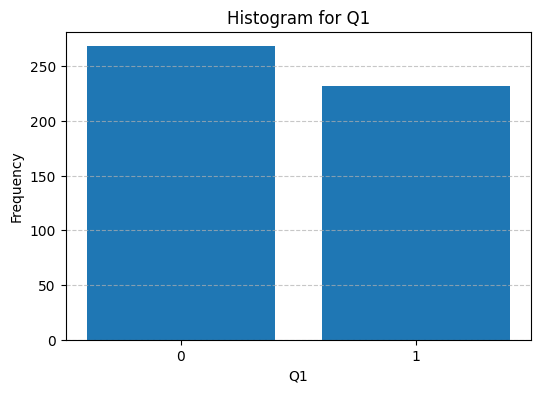

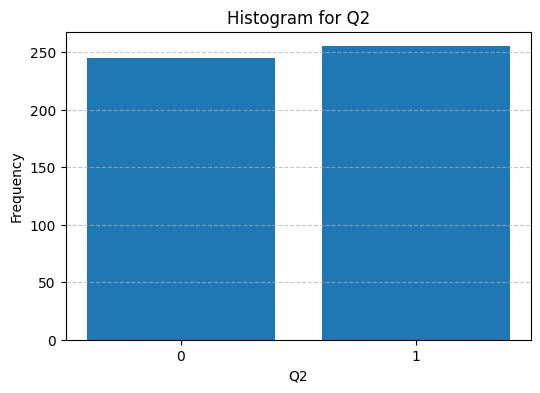

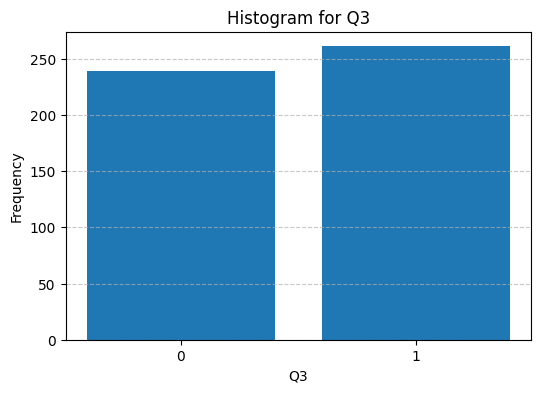

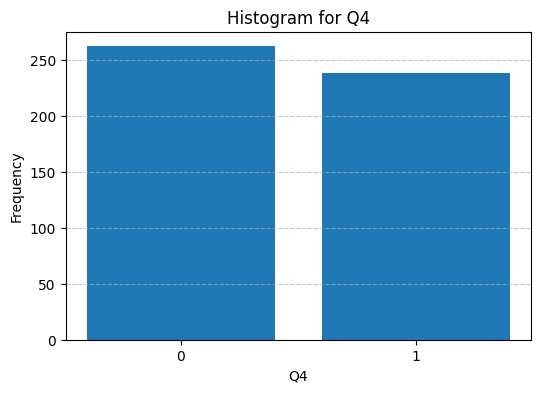

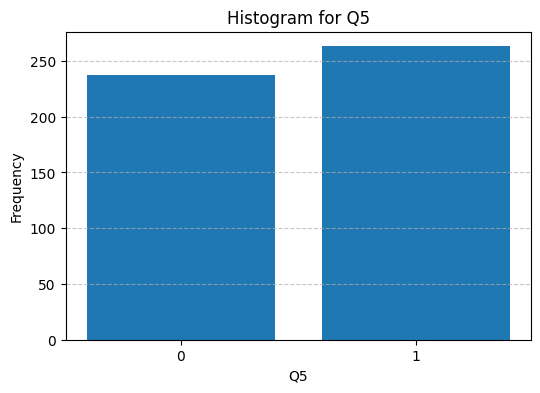

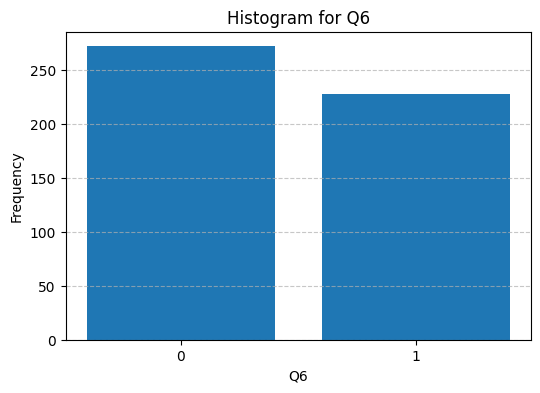

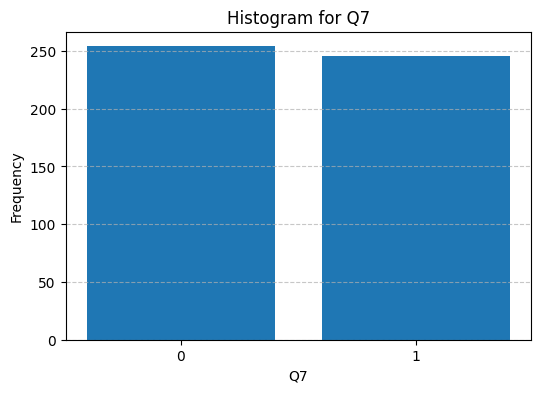

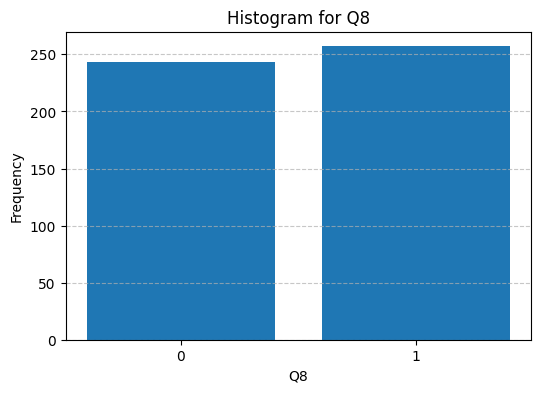

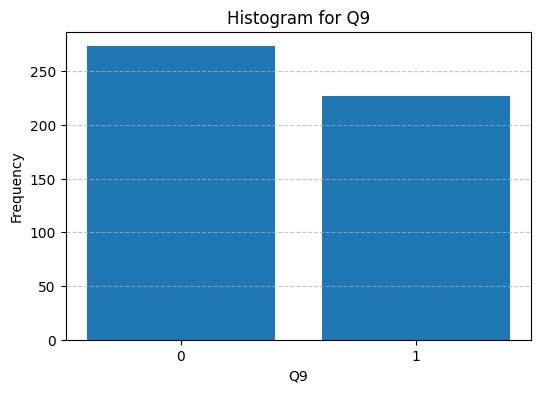

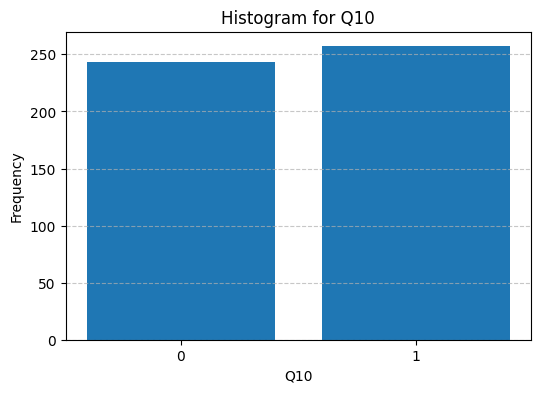

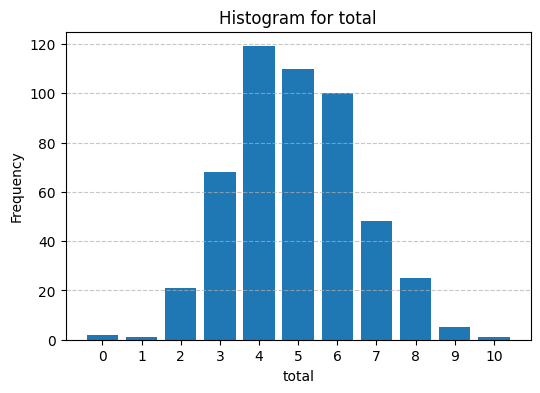

In [11]:
# Columns to plot (Q1 through Q10 and 'total')
columns_to_plot = df3.columns[1:11].tolist() + ['total']

# Plot histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(df3[column], bins=range(df3[column].max() + 2), align='left', rwidth=0.8)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(range(df3[column].max() + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

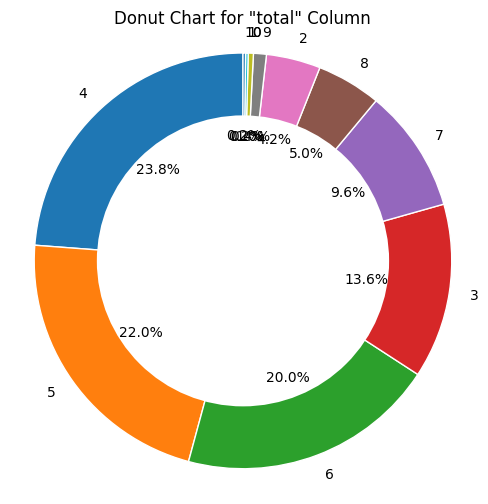

In [16]:
# Calculate the counts of values in the 'total' column
total_counts = df3['total'].value_counts()

# Create a donut chart for the 'total' column
plt.figure(figsize=(6, 6))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal so that the pie appears as a circle
plt.axis('equal')
plt.title('Donut Chart for "total" Column')
plt.show()

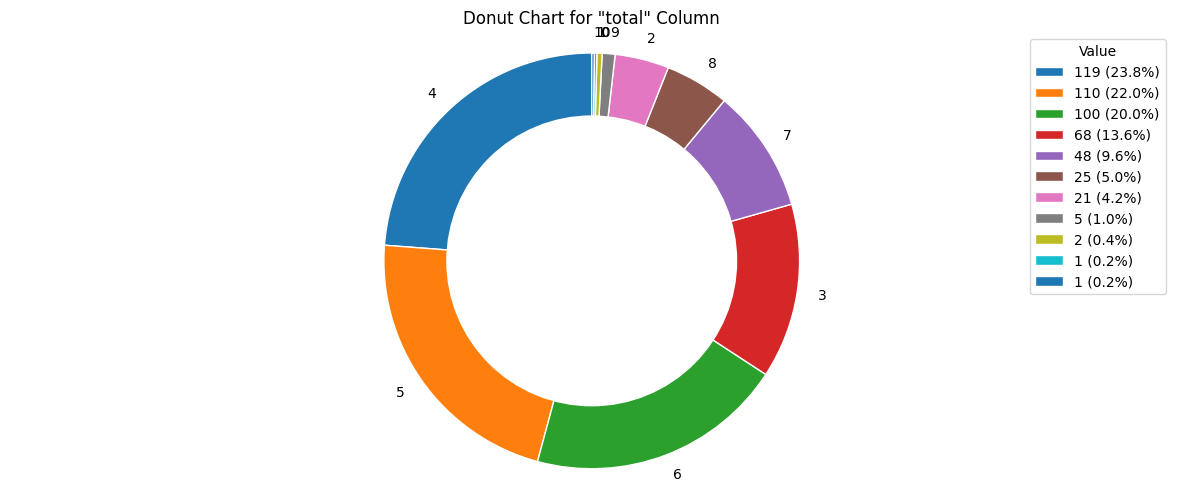

In [18]:
# Calculate the counts of values in the 'total' column
total_counts = df3['total'].value_counts()

# Create a donut chart for the 'total' column
plt.figure(figsize=(15, 6))
plt.pie(total_counts, labels=total_counts.index, autopct='', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal so that the pie appears as a circle
plt.axis('equal')
plt.title('Donut Chart for "total" Column')

# Create a legend with percentage information
legend_labels = [f'{count} ({count/len(df3)*100:.1f}%)' for count in total_counts]
plt.legend(legend_labels, title='Value', loc='upper right')

plt.show()

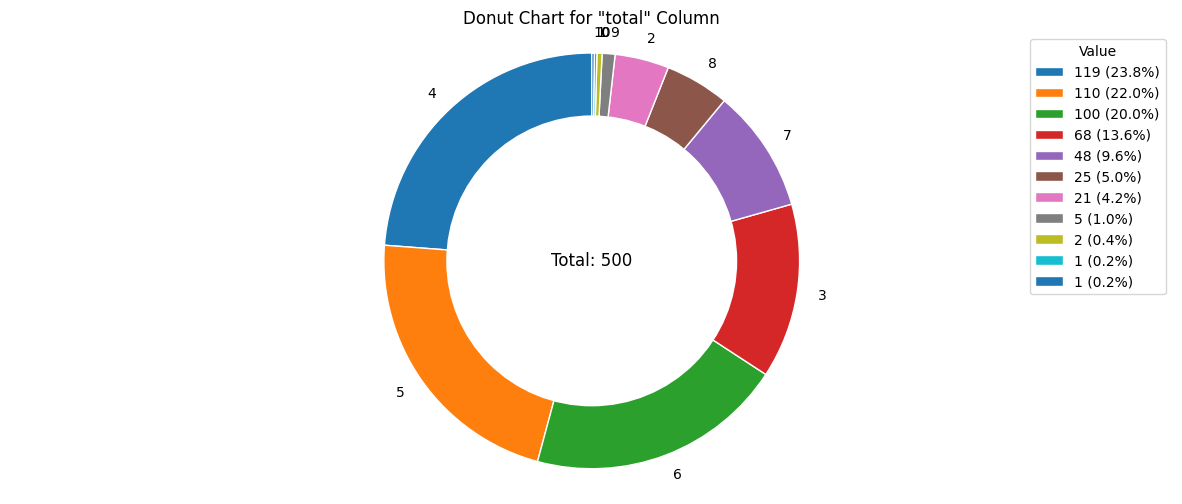

In [19]:
# Calculate the counts of values in the 'total' column
total_counts = df3['total'].value_counts()

# Create a donut chart for the 'total' column
plt.figure(figsize=(15, 6))
plt.pie(total_counts, labels=total_counts.index, autopct='', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal so that the pie appears as a circle
plt.axis('equal')
plt.title('Donut Chart for "total" Column')

# Create a legend with percentage information
legend_labels = [f'{count} ({count/len(df3)*100:.1f}%)' for count in total_counts]
plt.legend(legend_labels, title='Value', loc='upper right')

# Add the total of 500 in the center
plt.text(0, 0, 'Total: 500', fontsize=12, ha='center', va='center')

plt.show()